In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
crime = pd.read_csv('crime.csv')
shoot = pd.read_csv('denver_police_officer_involved_shootings.csv')

In [3]:
plt.rcParams['figure.figsize'] = (16, 9)

In [4]:
shootings = pd.read_csv('denver_police_officer_involved_shootings.csv')

In [5]:
subs = shootings[shootings['ROLE'] == 'Subject']

In [6]:
long = subs.groupby(['INITIAL_CONTACT', 'CONTACT_BASIS', 'CASUALTY'])['INCIDENT_NUMBER'].count().reset_index()
long.columns = ['Initial Contact', 'Contact Basis', 'Casualty', 'Count']

In [8]:
index2 = pd.MultiIndex.from_arrays(long[['Initial Contact', 'Contact Basis']].values.T, 
                                       names=['Initial Contact', 'Contact Basis'])

In [9]:
wide = long.pivot_table(index=index2, columns='Casualty', values='Count').fillna(0.0)

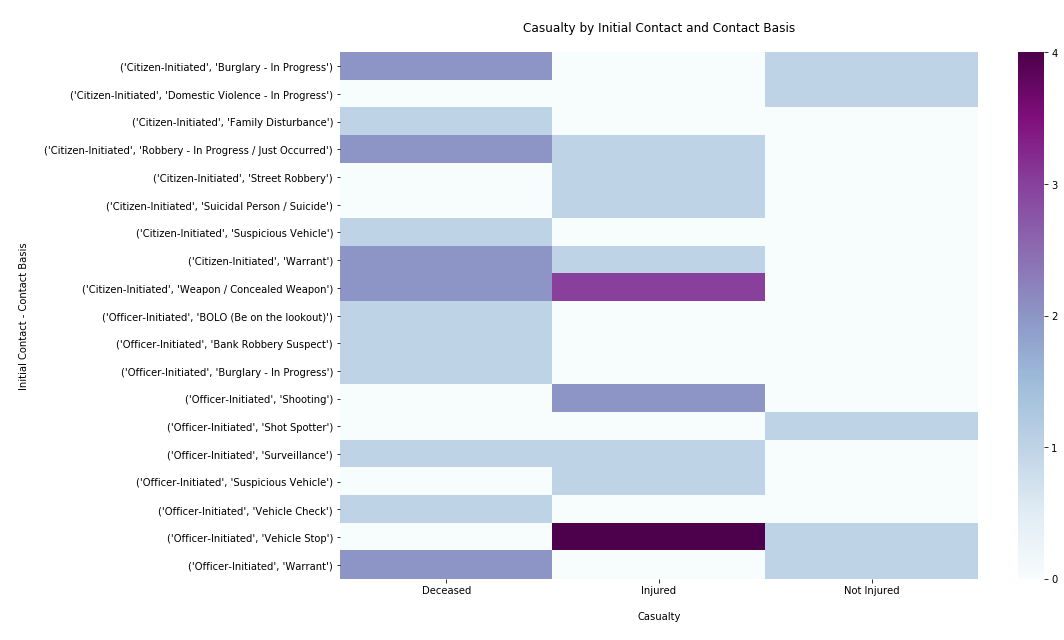

In [10]:
ax = sns.heatmap(wide, cmap="BuPu")
plt.xlabel('\nCasualty\n')
plt.ylabel('\nInitial Contact - Contact Basis\n')
plt.title('\nCasualty by Initial Contact and Contact Basis\n')
plt.savefig('HeatMap.png')
cbar = ax.collections[0].colorbar
cbar.set_ticks([0, 1, 2, 3, 4])
plt.tight_layout()
plt.savefig('StorylineHeatMap.png')